# Ex
### Exercise 7.1
- 12, 15

### Exercise 7.2
- 4, 7, 10

### Exercise 7.3
- 2, 5

### Exercise 7.4
- 7, 10

### Exercise 7.5
- 2, 4

# Com Ex
### Computer Exercise 7.1
- 3

### Computer Exercise 7.2
- 8

### Computer Exercise 7.3
- 5, 14

### Computer Exercise 7.4
- 2, 3, 17

### Computer Exercise 7.5
- 5, 7b

In [4]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

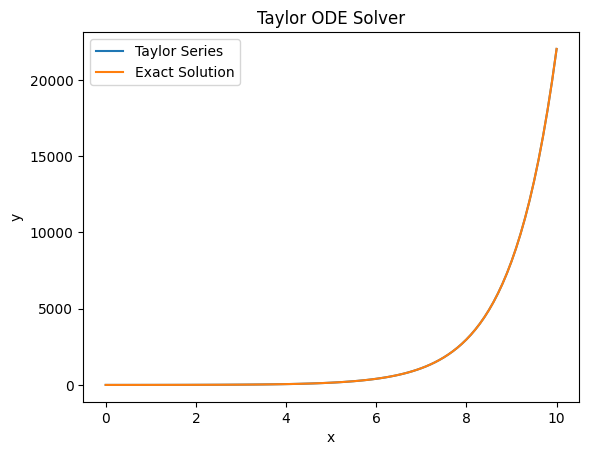

In [2]:
# 7.1 - 3

def taylor_ode_solver(f, y0, x0, x1, h, order=10):
    x = x0
    y = y0
    ret = [(x, y)]
    n = int((x1 - x0) / h)
    for i in range(n):
        tmp = 0
        for j in range(1, order + 1):
            tmp += (h ** j) * (f(x, y) / math.factorial(j))
        y += tmp
        x += h
        ret.append((x, y))
    
    return ret

f = lambda x, y: y  # dy/dx = y
sol = taylor_ode_solver(f, 1, 0, 10, 0.1)

times = [pt[0] for pt in sol]
values = [pt[1] for pt in sol]

plt.plot(times, values, label='Taylor Series')
plt.plot(times, [math.exp(t) for t in times], label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Taylor ODE Solver")
plt.legend()
plt.show()


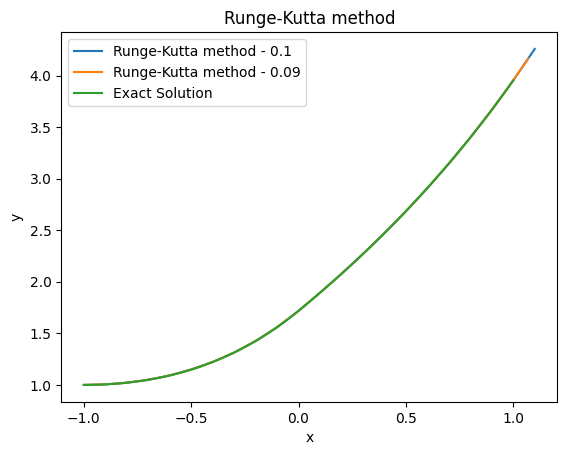

In [3]:
# 7.2 - 8

def fourth_runge_kutta(f, y0, x0, x1, h):
    n = int((x1 - x0) / h) + 1
    x = x0
    y = y0
    ret = [(x, y)]
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        ret.append((x, y))
    
    return ret

def f(t, y):
    if t < 0:
        return y + t
    else:
        return y - t
    
def exact_solution(t):
    if t < 0:
        return math.exp(t+1) - (t+1)
    else:
        return math.exp(t+1) - 2*math.exp(t) + (t+1)
    
sol = fourth_runge_kutta(f, 1, -1, 1, 0.1) 
plt.plot([pt[0] for pt in sol], [pt[1] for pt in sol], label='Runge-Kutta method - 0.1')
sol = fourth_runge_kutta(f, 1, -1, 1, 0.09) 
plt.plot([pt[0] for pt in sol], [pt[1] for pt in sol], label='Runge-Kutta method - 0.09')
x = np.linspace(-1, 1, 100)
plt.plot(x, [exact_solution(t) for t in x], label='Exact Solution')
plt.title('Runge-Kutta method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3
2.999921875
2.99984375
2.999765625
2.9996875000000003
2.9996093750000004
2.9995312500000004
2.9994531250000005
2.9993750000000006
2.9992968750000006
2.9992187500000007
2.999140625000001
2.999062500000001
2.998984375000001
2.998906250000001
2.998828125000001
2.998750000000001
2.998671875000001
2.9985937500000013
2.9985156250000014
2.9984375000000014
2.9983593750000015
2.9982812500000016
2.9982031250000016
2.9981250000000017
2.9980468750000018
2.997968750000002
2.997890625000002
2.997812500000002
2.997734375000002
2.997656250000002
2.997578125000002
2.9975000000000023
2.9974218750000023
2.9973437500000024
2.9972656250000025
2.9971875000000026
2.9971093750000026
2.9970312500000027
2.9969531250000028
2.996875000000003
2.996796875000003
2.996718750000003
2.996640625000003
2.996562500000003
2.996484375000003
2.9964062500000033
2.9963281250000033
2.9962500000000034
2.9961718750000035
2.9960937500000036
2.9960156250000036
2.9959375000000037
2.9958593750000038
2.995781250000004
2.995703125000

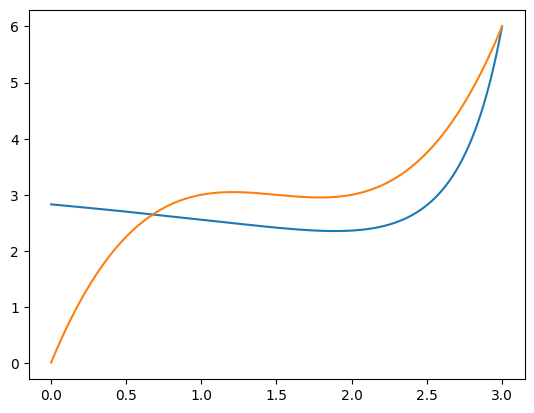

In [10]:
# 7.3 - 5
def runge_kutta_fehlberg_adaptive(f, y0, x0, x1, h0, e_max, e_min, h_max, h_min):
    h = h0
    ret = [(x0, y0)]
    x = x0
    y = y0

    while np.abs(x1 - x) > np.abs(h):
        if (h > 0 and x + h > x1) or (h < 0 and x + h < x1):
            h = x1 - x
        
        if np.abs(h) > np.abs(h_max):
            h = np.sign(h) * np.abs(h_max)
        elif np.abs(h) < np.abs(h_min):
            h = np.sign(h) * np.abs(h_min)

        k1 = h * f(x, y)
        k2 = h * f(x + h / 4, y + k1 / 4)
        k3 = h * f(x + 3 * h / 8, y + 3 * k1 / 32 + 9 * k2 / 32)
        k4 = h * f(x + 12 * h / 13, y + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197)
        k5 = h * f(x + h, y + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104)
        k6 = h * f(x + h / 2, y - 8 * k1 / 27 + 2 * k2 - 3544 * k3 / 2565 + 1859 * k4 / 4104 - 11 * k5 / 40)

        y4 = y + 25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5
        y5 = y + 16 * k1 / 135 + 6656 * k3 / 12825 + 28561 * k4 / 56430 - 9 * k5 / 50 - 2 * k6 / 55

        error = np.abs(y5 - y4)

        if error > e_max:
            h *= 0.5
            continue
        else:
            print(x)
            x += h
            y = y5
            ret.append((x, y))
            if error < e_min:
                h *= 2

    return ret

exact_solution = lambda x: x**3 - 9 * x**2 / 2 + 13 / 2 * x
f = lambda x, y: 3 * x / y + 9 * y / 2 - 13

sol = runge_kutta_fehlberg_adaptive(f, 6, 3, 0, -0.01, e_max=0.0001, e_min=0.000001, h_max=0.1, h_min=1e-9)
plt.plot([pt[0] for pt in sol], [pt[1] for pt in sol], label='Runge-Kutta-Fehlberg Adaptive')
plt.plot([pt[0] for pt in sol], [exact_solution(pt[0]) for pt in sol], label='Exact Solution')
plt.show()

In [5]:
# 7.3 - 14

0.0078125


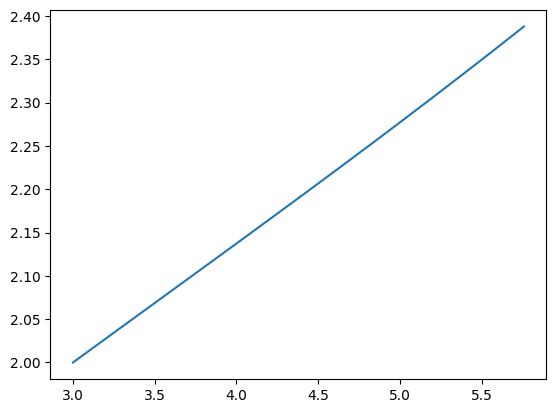

In [ ]:
# 7.4 - 2
def taylor_ode_solver(f, x0, y0, t0, t1, h):
    n = int((t1 - t0) / h)
    t = t0
    x = x0
    y = y0
    result = [(t, x, y)]
    order = len(f)

    for _ in range(n):
        next_x = [x]
        next_y = [y]
        
        for i in range(order):
            dxi, dyi = f[i](t, x0, y0)
            next_x.append(dxi)
            next_y.append(dyi)
        
        x_inc = 0
        y_inc = 0
        for i in range(order):
            coeff = (h ** (i + 1)) / math.factorial(i + 1)
            x_inc += coeff * next_x[i + 1]
            y_inc += coeff * next_y[i + 1]
        x += x_inc
        y += y_inc
        
        t += h
        result.append((t, x, y))
    
    return result

def f1(t, x, y):
    return t + x**2 - y, t**2 - x + y**2

def f2(t, x, y):
    return 1 + 2*x*(t + x**2 - y) - (t**2 - x + y**2), t - x**2 + y + 2*t**2*y - 2*x*y + 2*y**3

def f3(t, x, y):
    return (2*(t+x**2-y)**2 + 2*x*(1 + 2*x*(t+x**2-y) - (t**2 - x + y**2)) - 2*t + (t+x**2-y) - 2*y*(t**2 - x + y**2)),  (1 - 2*x*(t+x**2-y) + (t**2 - x + y**2) + 4*t*y +  2*t**2*(t**2 - x + y**2) - 2*(((t+x**2-y)*y) + x*(t**2 - x + y**2)) + 6*y**2*(t**2 - x + y**2))
solution = taylor_ode_solver([f1, f2, f3], 3, 2, 0, 0.38, 1/128)
plt.plot([pt[1] for pt in solution], [pt[2] for pt in solution], label='Taylor ODE Solver')


In [7]:
# 7.4 - 3

In [8]:
# 7.4 - 17

In [9]:
# 7.5 - 4

In [ ]:
# 7.5 - 7b